## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [5]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Tra

50000/50000 [==============================] - 5s 103us/step - loss: 2.3021 - accuracy: 0.1058 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3042 - accuracy: 0.1001 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3044 - accuracy: 0.1012 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3039 - accuracy: 0.1014 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3043 - accuracy: 0.0985 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.3045 - accuracy: 0.0985 - val_loss: 2.3033 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer

Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.4702 - accuracy: 0.8315 - val_loss: 1.9264 - val_accuracy: 0.5318
Epoch 44/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.4697 - accuracy: 0.8317 - val_loss: 1.9663 - val_accuracy: 0.5272
Epoch 45/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.4362 - accuracy: 0.8435 - val_loss: 2.1049 - val_accuracy: 0.5251
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.4360 - accuracy: 0.8427 - val_loss: 2.1178 - val_accuracy: 0.5259
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.4032 - accuracy: 0.8551 - val_loss: 2.2176 - val_accuracy: 0.5206
Epoch 48/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.4012 - accuracy: 0.8552 - val_loss: 2.1870 - val_accuracy: 0.5270
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.3810 - accuracy: 0.8632

Epoch 41/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.9733 - accuracy: 0.6591 - val_loss: 1.4970 - val_accuracy: 0.4961
Epoch 42/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.9607 - accuracy: 0.6654 - val_loss: 1.3789 - val_accuracy: 0.5253
Epoch 43/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.9487 - accuracy: 0.6680 - val_loss: 1.5047 - val_accuracy: 0.5046
Epoch 44/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.9382 - accuracy: 0.6751 - val_loss: 1.3932 - val_accuracy: 0.5260
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.9280 - accuracy: 0.6757 - val_loss: 1.4057 - val_accuracy: 0.5275
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.9113 - accuracy: 0.6809 - val_loss: 1.4938 - val_accuracy: 0.5082
Epoch 47/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.9060 - accuracy: 0.6821 - val

Epoch 39/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5966 - accuracy: 0.4428 - val_loss: 1.6064 - val_accuracy: 0.4355
Epoch 40/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5919 - accuracy: 0.4433 - val_loss: 1.5990 - val_accuracy: 0.4380
Epoch 41/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5872 - accuracy: 0.4459 - val_loss: 1.5942 - val_accuracy: 0.4385
Epoch 42/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5819 - accuracy: 0.4475 - val_loss: 1.5904 - val_accuracy: 0.4398
Epoch 43/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5775 - accuracy: 0.4493 - val_loss: 1.5863 - val_accuracy: 0.4437
Epoch 44/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5731 - accuracy: 0.4512 - val_loss: 1.5830 - val_accuracy: 0.4401
Epoch 45/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5684 - accuracy: 0.4525 - val

Epoch 37/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.9959 - accuracy: 0.3006 - val_loss: 1.9942 - val_accuracy: 0.3014
Epoch 38/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9916 - accuracy: 0.3022 - val_loss: 1.9900 - val_accuracy: 0.3025
Epoch 39/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9874 - accuracy: 0.3040 - val_loss: 1.9860 - val_accuracy: 0.3045
Epoch 40/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9832 - accuracy: 0.3051 - val_loss: 1.9822 - val_accuracy: 0.3045
Epoch 41/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9792 - accuracy: 0.3057 - val_loss: 1.9781 - val_accuracy: 0.3084
Epoch 42/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9753 - accuracy: 0.3086 - val_loss: 1.9743 - val_accuracy: 0.3099
Epoch 43/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9715 - accuracy: 0.3099 - val_

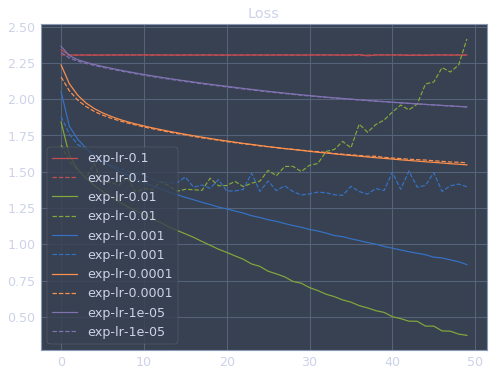

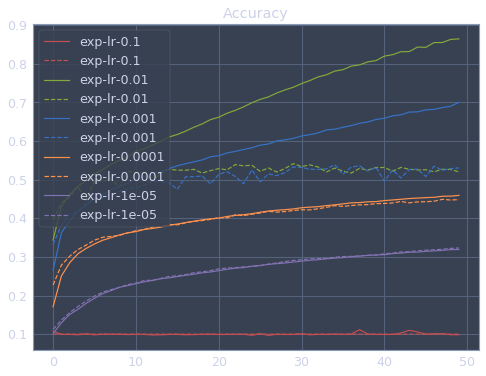

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現